In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = {}
for i in range(25):
    data[f'df{i}'] = pd.read_csv(f'~/git_env/research/oshea/trident_modifications/testing_mods/SolAb/test_sal/abundance_test3/data/data_row{i}_.csv', delim_whitespace=True)

In [12]:
df1 = data['df0']

def what_ions(df, ion_list, ray_index):
    """
    determines what ions are returned in handy dandy dataframe from salsa 
    
    :ion_list: list of ions initially passed to salsa
    
    :ray: lightray index from salsa dataframe
    """
    names = []

    for i in ion_list:

        if i in df['name'].tolist():
            if i in ray_index['name'].tolist():
                names.append(i)
            else:
                pass
        else:
            pass
    
    return names

names = what_ions(df = df1, ion_list = ['Ne VIII', 'Mg X', 'O VI', 'S IV', 'Si III', 'C II', 'N I'], ray_index = df1[df1['lightray_index'] == 62])

In [147]:
def pick_intervals(file_dictionary, lightray):
    
    master_df = pd.DataFrame()
    
    for df in file_dictionary:
        obj = file_dictionary[df]
        master_df = master_df.append(obj[obj['lightray_index'] == lightray])
        
    master_df.reset_index(inplace=True)
    
    index_list = []
    
    for index in range(len(master_df)):
        
        magic_start = master_df['interval_start'][index]
        magic_end = master_df['interval_end'][index]

        if index == 0:
            index_list.append([magic_start, magic_end])
        elif [magic_start, magic_end] in index_list:
            pass
        else:
            
            count = 0

            for x in range(len(index_list)):

                if [magic_start, magic_end] in index_list:
                    pass
                
                elif index_list[x][0] == magic_start:
                    if magic_end > index_list[x][1]:
                        index_list[x][1] = magic_end
                    else:
                        count += 1

                elif index_list[x][1] == magic_end:
                    if magic_start < index_list[x][0]:
                        index_list[x][0] = magic_start
                    else:
                        count += 1
  
            if [magic_start, magic_end] not in index_list and count == 0:
                index_list.append([magic_start, magic_end])
            
    return master_df, index_list

In [153]:
master_df, index_list = pick_intervals(data, 62)
index_list

[[102, 132.0],
 [178, 215.0],
 [373, 384.0],
 [351, 365.0],
 [215, 219.0],
 [232, 357.0],
 [258, 283.0],
 [284, 357.0],
 [357, 365.0],
 [234, 264.0],
 [266, 270.0],
 [273, 276.0],
 [277, 279.0]]

In [155]:
master_df[master_df['interval_start'] == 277]

,index,name,wave,redshift,col_dens,delta_v,vel_dispersion,interval_start,interval_end,density,temperature,metallicity,lightray_index
16,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
33,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
50,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
67,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
84,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
101,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
118,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
135,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
152,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0
169,40,N I,1200.223,0.0,13.106109,171.580968,0.064,277,279.0,2.732191e-26,16096.095518,1.046146,62.0


In [156]:
exab_df = master_df[master_df['interval_start'] == 277]
exab_df.reset_index(inplace=True)

In [157]:
def hist_plot(absorber_df, thing_we_care_about):
    """
    FUNCTION ASSUMES ABSORBER DATAFRAME INDICES HAVE ALREADY BEEN RESET TO START AT 0!!
    """
    dic = {}
    for index in range(len(absorber_df)):
        if index == 0:
            dic[f"{absorber_df['name'][index]}"] = []
        else:
            if absorber_df['name'][index] == absorber_df['name'][index-1]:
                pass
            else:
                dic[f"{absorber_df['name'][index]}"] = []
                
    for ion in dic:
        for index in range(len(absorber_df)):
            if absorber_df['name'][index] == ion:
                dic[ion].append(absorber_df[thing_we_care_about][index])
        plt.hist(dic[ion], label=ion)
    plt.legend()

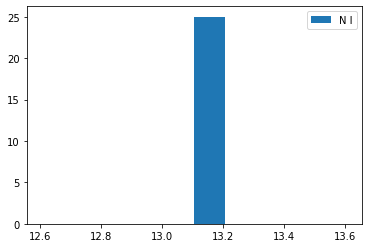

In [158]:
hist_plot(exab_df, 'col_dens')